# QSAR Model Building of Aromatase Inhibitors

Jesse Maki

------

Quantitative structure-activity relationship (QSAR) modeling has become a key tool in pharmaceutical research and development. By linking chemical structures to biological effects, QSAR can predict how active a compound may be without extensive lab testing. This computational approach has been useful for designing drugs against many targets, including aromatase - an enzyme important for making estrogen.

Aromatase inhibitors (AIs) are breast cancer drugs that slow tumor growth by reducing estrogen production. QSAR studies have identified chemical features that lead to strong aromatase inhibition. This has guided development of new potent AIs with improved selectivity and drug properties. Early QSAR models looked at steroid-based AIs, while newer works explore diverse chemical families with non-steroidal inhibitors. Properties like fat-solubility, hydrogen bonding, and molecule size/flexibility repeatedly impact model-building. The quantitative models from QSAR analyses have sped up AI discovery by predicting inhibition, decreasing screening needs, and elucidating structure-function relationships.

For information about data acqustiton please refer to the python scripts

### Read in Data

In [16]:
import pandas as pd

In [17]:
dataset = pd.read_csv('Data/aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.148742
1,CHEMBL111868,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.301030
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.623423
3,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.244125
4,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,CHEMBL5177269,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.045757
2112,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.142668
2113,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
2114,CHEMBL5179009,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.508638


In [18]:
X = dataset.drop(['pIC50','Name'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Y = dataset.iloc[:,-1]
Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2116, dtype: float64

### Remove Low Variance Features

In [20]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2112,1,1,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2113,0,0,1,1,0,1,1,0,1,1,...,1,1,0,1,1,0,1,0,0,0
2114,1,1,1,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0


In [21]:
X.to_csv('Data/descriptor_output.csv', index = False)

### Random Forest Regression Model

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=500, random_state=42)

# Check and replace Inf/NaN values in X
if np.any(np.isinf(X) | np.isnan(X)):
    X = np.where(np.isinf(X), np.nan, X)
    X = np.nan_to_num(X, nan=np.nanmean(X))

# Check and replace Inf/NaN values in Y
if np.any(np.isinf(Y) | np.isnan(Y)):
    Y = np.where(np.isinf(Y), np.nan, Y)
    Y = np.nan_to_num(Y, nan=np.nanmean(Y))

# Fit the model and score
model.fit(X, Y)
r2 = model.score(X, Y)
print(r2)

0.7710455694303627


### Model Prediction

In [24]:
Y_pred = model.predict(X)
Y_pred

array([5.68467582, 5.18933972, 6.5226678 , ..., 5.45514096, 8.38207494,
       6.77422897])

### Model Performance

In [25]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.39
Coefficient of determination (R^2): 0.77


### Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

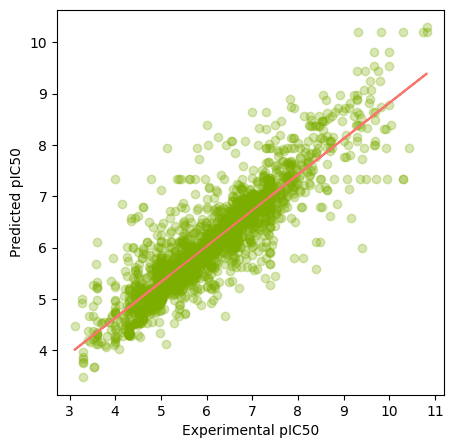

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')